Accuracy:  0.9532163742690059
Precision: 0.9464285714285714
Recall: 0.9814814814814815
F1: 0.9636363636363636


Classification Report:                precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

AUC:  0.941358024691358


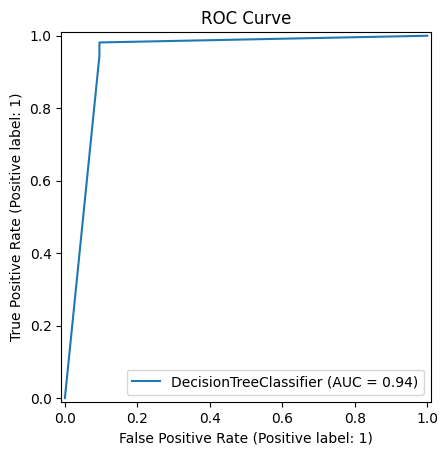

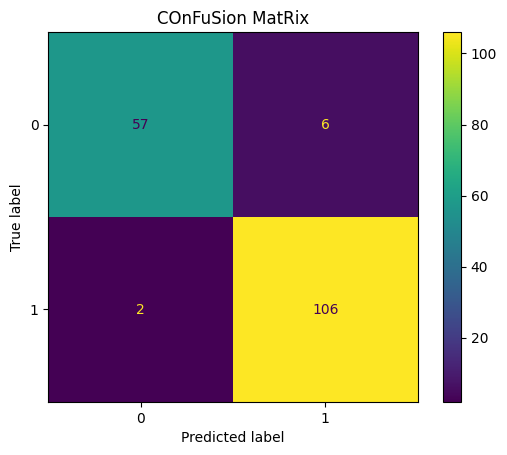

In [2]:

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

iris = load_breast_cancer()
X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=42)

dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth=5)  # criterion='gini'|'entropy' , max_depth = 3 , None
dtc.fit(X_train, Y_train)

y_pred = dtc.predict(X_test)

Accuracy = accuracy_score(Y_test,y_pred)
Precision = precision_score(Y_test,y_pred)
Recall = recall_score(Y_test, y_pred)
F1 = f1_score(Y_test,y_pred)

print("Accuracy: ",Accuracy)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)
print("\n")

print("Classification Report: ", classification_report(Y_test,y_pred))

y_probs = dtc.predict_proba(X_test)[:,1]
auc = roc_auc_score(Y_test,y_probs)
print("AUC: ",auc)

RocCurveDisplay.from_estimator(dtc,X_test,Y_test)
plt.title("ROC Curve")
plt.show()

ConfusionMatrixDisplay.from_estimator(dtc,X_test,Y_test)
plt.title("COnFuSion MatRix")
plt.show()
